 # Opis notatnika
 Ten notatnik jest kontunacją analizy danych o lotach i ich opóźnieniach. Od tego momentu zaczniemy łączyć posiadana przez nas zbiory danych, będąc w stanie dokonać dodatkowych analiz.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednim kroku, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [1]:
import urllib.parse
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [2]:
username = 'postgres'
password = 'SQLisFun'

host = 'localhost'
database = 'airlines'
port = None

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [3]:
url= URL.create(
    "postgresql",
    username=username,
    password=password, 
    host=host,
    database=database,
)

engine = create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [4]:
def read_sql_table(table_name):
    return pd.read_sql(table_name, con=engine)

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [5]:
flight_df = pd.read_csv(
                    r'..\data\processed\flight_df_01.csv', 
                    sep=',',  
                    decimal='.' 
)

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,4,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,4,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,4,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,3,0.0,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,3,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,5,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]"


Sprawdzenie poprawności danych w ramce `flight_df` 

In [6]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 # Wzbogacenie o `aircraft`
 Używając procedury `read_sql_table` wczytaj dane z tabeli `aircraft` i zapisz jako `aircraft_df`. Następnie:  
 1. Usuń z ramki kolumny `number_of_seats` oraz `id`. Na tej podstawie usuń nadmiarowe wiersze (duplikaty).  
 1. Następnie jeszcze raz sprawdź, czy dla kolumny `tail_num` nie występują duplikaty. Innymi słowy należy sprawdzić, czy dla jednego `tail_num` występuje więcej niż jeden rok produkcji.  
 1. Jeśli tak to:  
     - do ramki `aircraft_df_duplicated` zapisz powielone zgodnie ze sprawdzeniem wiersze,  
     - zgodnie z powyższym zmodyfikuj ramkę tak, aby w przypadku duplikatu za datę wytworzenia samolotu, uznana została najnowsza tj. jeśli dla `tail_num` są dostępne daty produkcji 1998 oraz 2001, uznajemy, że `tail_num` został wyprodukowany w `2001`.

 Wskazówki:
 - Praca z duplikatami na LMS: `Python - analiza danych -> Dzień 5 - Pandas -> Duplikaty`
 - Dokumentacja metody `duplicated`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)
 - Dokumentacja metody `drop_duplicates`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

 Tutaj wczytaj tabelę `aircraft` używając `read_sql_table`

In [7]:
aircraft_df = read_sql_table('aircraft')
aircraft_df

,id,manufacture_year,tail_num,number_of_seats
0,29533,1944,N54514,0.0
1,29534,1945,N1651M,0.0
2,29535,1953,N100CE,0.0
3,29536,1953,N141FL,0.0
4,29537,1953,N151FL,0.0
...,...,...,...,...
7378,36911,2019,N14011,337.0
7379,36912,2019,N16008,337.0
7380,36913,2019,N16009,337.0
7381,36914,2019,N2250U,276.0


 Tutaj usuń kolumny `number_of_seats`, `id` oraz duplikaty z ramki `aircraft_df`

In [8]:
aircraft_df = aircraft_df[['manufacture_year', 'tail_num']].drop_duplicates()
aircraft_df

,manufacture_year,tail_num
0,1944,N54514
1,1945,N1651M
2,1953,N100CE
3,1953,N141FL
4,1953,N151FL
...,...,...
7378,2019,N14011
7379,2019,N16008
7380,2019,N16009
7381,2019,N2250U


In [9]:
duplicates = (aircraft_df['tail_num'].loc[aircraft_df['tail_num'].duplicated()]).to_frame()
duplicates

,tail_num
2086,N783CA
5725,N856GT
6746,N877AS


In [10]:
aircraft_df_duplicated = aircraft_df.loc[aircraft_df['tail_num'].isin(duplicates['tail_num'])]
aircraft_df_duplicated 

,manufacture_year,tail_num
1734,1999,N783CA
2086,2000,N783CA
2460,2001,N877AS
4917,2011,N856GT
5725,2014,N856GT
6746,2017,N877AS


In [11]:
aircraft_df_duplicated  = aircraft_df_duplicated.drop_duplicates(subset = 'tail_num', keep= 'last' )
aircraft_df_duplicated 

,manufacture_year,tail_num
2086,2000,N783CA
5725,2014,N856GT
6746,2017,N877AS


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [12]:
aircraft_df_expected_rows = 7364
aircraft_df_expected_columns = set(['tail_num', 'manufacture_year'])

aircraft_df_rows = aircraft_df.shape[0]

diff = aircraft_df_expected_columns.symmetric_difference(set(aircraft_df.columns))
assert aircraft_df_rows == aircraft_df_expected_rows, f'Spodziewano się {aircraft_df_expected_rows} wierszy , otrzymano {aircraft_df_rows} wierszy'

assert diff == set([]), f'Spodziewano się {aircraft_df_expected_columns} kolumn, otrzymano: {aircraft_df_expected_columns} kolumn. Różnica: \n\t{diff}'

 Tutaj sprawdź czy w ramkce `aircraft_df` występują duplikaty wewnątrz kolumny `tail_num`. Czyli czy dla danego `tail_num` występuje więcej niż jeden rok produkcji.

In [13]:
aircraft_df_is_duplicated = aircraft_df.duplicated(subset='tail_num')
aircraft_df_duplicated = aircraft_df.loc[aircraft_df_is_duplicated]

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić czy ta część została poprawnie wykonana

In [14]:
aircraft_df_expected_rows = 3
aircraft_df_duplicated_rows = aircraft_df_duplicated.shape[0]
assert aircraft_df_duplicated_rows == aircraft_df_expected_rows, f"Oczekiwano {aircraft_df_expected_rows} wierszy, otrzymano {aircraft_df_duplicated_rows}"

 ## Modyfikacja `aircraft_df`
 Tutaj dokonaj aktualizacji tabeli `aircraft_df` - jeśli jest taka potrzeba. Zrób to tak aby, dla powielonych `tail_num`, `manufacture_year` został ustawiony jako najwyższy

In [15]:
merged = aircraft_df.merge(aircraft_df_duplicated , on='tail_num', how='left')
merged

,manufacture_year_x,tail_num,manufacture_year_y
0,1944,N54514,NaN
1,1945,N1651M,NaN
2,1953,N100CE,NaN
3,1953,N141FL,NaN
4,1953,N151FL,NaN
...,...,...,...
7359,2019,N14011,NaN
7360,2019,N16008,NaN
7361,2019,N16009,NaN
7362,2019,N2250U,NaN


In [16]:
merged['manufacture_year_x'] = merged['manufacture_year_y'].fillna(merged['manufacture_year_x'])
merged['manufacture_year_x'] = merged['manufacture_year_x'].astype(int)
merged['manufacture_year_x']

0       1944
1       1945
2       1953
3       1953
4       1953
        ... 
7359    2019
7360    2019
7361    2019
7362    2019
7363    2019
Name: manufacture_year_x, Length: 7364, dtype: int32

In [17]:
merged.drop('manufacture_year_y', axis=1, inplace=True)
merged.rename(columns={'manufacture_year_x': 'manufacture_year'}, inplace=True)
merged

,manufacture_year,tail_num
0,1944,N54514
1,1945,N1651M
2,1953,N100CE
3,1953,N141FL
4,1953,N151FL
...,...,...
7359,2019,N14011
7360,2019,N16008
7361,2019,N16009
7362,2019,N2250U


In [18]:
aircraft_df = merged
aircraft_df 

,manufacture_year,tail_num
0,1944,N54514
1,1945,N1651M
2,1953,N100CE
3,1953,N141FL
4,1953,N151FL
...,...,...
7359,2019,N14011
7360,2019,N16008
7361,2019,N16009
7362,2019,N2250U


In [19]:
aircraft_df.loc[aircraft_df['tail_num'].isin(aircraft_df_duplicated['tail_num'])]

,manufacture_year,tail_num
1730,2000,N783CA
2082,2000,N783CA
2453,2017,N877AS
4898,2014,N856GT
5706,2014,N856GT
6727,2017,N877AS


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [20]:
test_tail = 'N783CA'
test_value = aircraft_df.loc[aircraft_df['tail_num']
                             == test_tail]['manufacture_year']
test_value = int(test_value)

expected_value = 2000
assert test_value == expected_value, f"Dla 'tail_num' == '{test_tail}' oczekiwano {expected_value} otrzymano {test_value}"

TypeError: cannot convert the series to <class 'int'>

 ## Połączenie `aircraft_df` oraz `flight_df`
 Połącz ramkę `aircraft_df` oraz `flight_df` zgodnie z kluczem oraz odpowiedz na następujące pytania:
 1. Czy po połączeniu pojawiły się duplikaty? Dokonaj odpowiedniego sprawdzenia.
 1. Wyznacz zależność roku produkcji do częstotliwości opóźnień. Wynik zapisz do tabeli `delays_by_manufacture_year_df`.
 1. Przedstaw wyniki w tabeli za pomocą wykresu punktowego.
 1. Dokonaj modyfikacji w taki sposób, aby wyświetlone na wykresie zostały tylko takie roczniki samolotów, które wykonały łącznie więcej niż 10000 `(>)` lotów.

> **Wskazówka:**
> Aby nie utracić potencjalnie całej dotychczasowej pracy, zapisz wynik do tymczasowej zmiennej np. `tmp_flight_df`. Po sprawdzeniu możesz użyć metody `copy`: [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html), aby nadpisać `flight_df` używając `tmp_flight_df`.

 Tutaj dokonaj złączenia `flight_df` z `aircraft_df`, wynik zapisz do `tmp_flight_df`

In [24]:
tmp_flight_df = pd.merge(
    left = flight_df,
    right = aircraft_df ,
    how = 'left',
    left_on = ['tail_num'],
    right_on = ['tail_num']
)

tmp_flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]",2017.0
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]",2005.0
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]",2000.0
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]",2005.0
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]",2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057403,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0
1057404,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0
1057405,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0
1057406,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0


 Tutaj dokonaj sprawdzenia, czy nie pojawiły się duplikaty

In [25]:
tmp_flight_df = tmp_flight_df.drop_duplicates()
tmp_flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]",2017.0
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]",2005.0
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]",2000.0
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]",2005.0
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]",2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057403,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0
1057404,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0
1057405,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0
1057406,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0


 Tutaj nadpisz `flight_df` używając `tmp_flight_df`

In [26]:
flight_df = tmp_flight_df.copy()
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]",2017.0
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,5.0,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]",2005.0
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]",2000.0
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,84.0,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]",2005.0
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]",2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057403,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0
1057404,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0
1057405,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0
1057406,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0


 ## Opóźnienia vs. rok produkcji samolotu cz. 1
 Tutaj wyznacz zależność roku produkcji do częstotliwości opóźnień

In [27]:
delays_by_manufacture_year_df = flight_df.groupby('manufacture_year')['dep_delay'].sum().to_frame().reset_index()
delays_by_manufacture_year_df 

,manufacture_year,dep_delay
0,1987.0,5948.0
1,1988.0,9955.0
2,1989.0,596.0
3,1990.0,62373.0
4,1991.0,109811.0
5,1992.0,198910.0
6,1993.0,86995.0
7,1994.0,109884.0
8,1995.0,132311.0
9,1996.0,193492.0


 Tutaj wyrysuj ramkę `delays_by_manufacture_year_df`

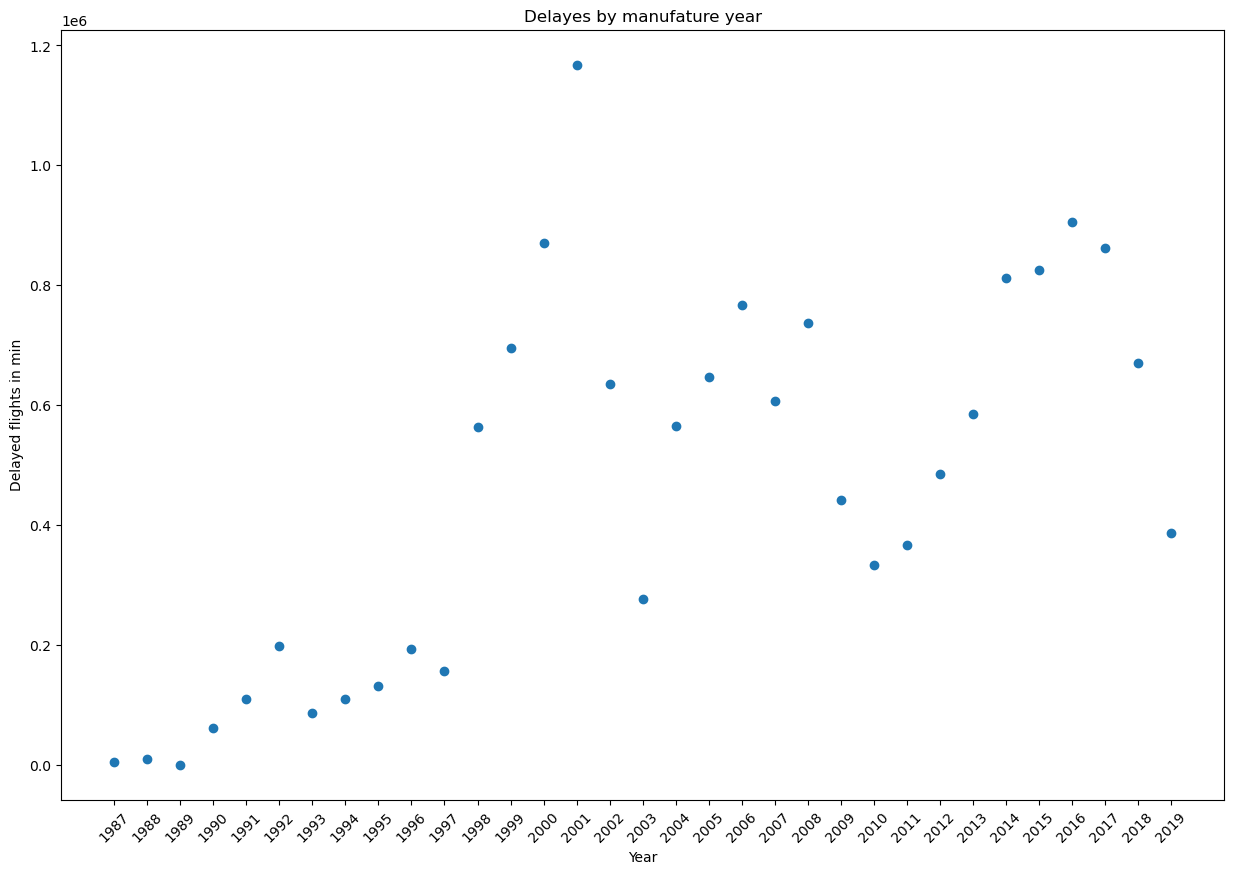

In [28]:
plt.figure(figsize = (15,10))

plt.scatter(delays_by_manufacture_year_df['manufacture_year'], delays_by_manufacture_year_df['dep_delay'] )

plt.title('Delayes by manufature year')
plt.ylabel(ylabel='Delayed flights in min')
plt.xlabel(xlabel='Year')
plt.xticks(delays_by_manufacture_year_df['manufacture_year'], rotation=45)

plt.show()

 Tutaj zmodyfikuj wykres tak, aby prezentował tylko te roczniki, które odbyły więcej niż 10000 lotów

In [29]:
flight_df_10000 = flight_df.groupby('manufacture_year')['id'].count().to_frame().reset_index()
flight_df_10000 = flight_df_10000.loc[flight_df_10000['id'] > 10000]
flight_df_10000

,manufacture_year,id
5,1992.0,13882
9,1996.0,12186
11,1998.0,40317
12,1999.0,44018
13,2000.0,58215
14,2001.0,100251
15,2002.0,35845
16,2003.0,21081
17,2004.0,43266
18,2005.0,41621


In [30]:
delays_by_manufacture_year_updated_df = delays_by_manufacture_year_df.loc[delays_by_manufacture_year_df['manufacture_year'].isin(flight_df_10000['manufacture_year'])]
    
delays_by_manufacture_year_updated_df

,manufacture_year,dep_delay
5,1992.0,198910.0
9,1996.0,193492.0
11,1998.0,564111.0
12,1999.0,694719.0
13,2000.0,870558.0
14,2001.0,1167796.0
15,2002.0,634755.0
16,2003.0,277354.0
17,2004.0,565000.0
18,2005.0,646599.0


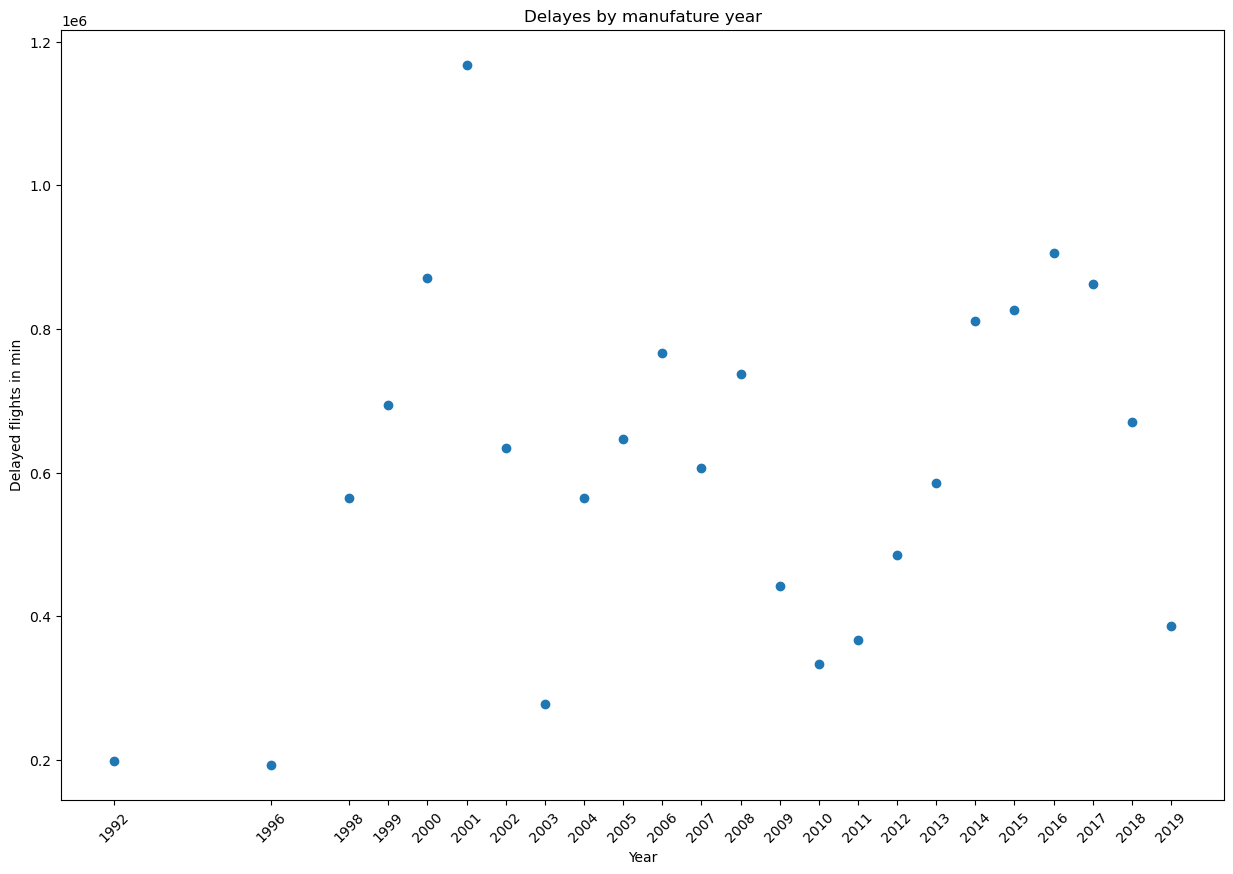

In [31]:
plt.figure(figsize = (15,10))

plt.scatter(delays_by_manufacture_year_updated_df['manufacture_year'], delays_by_manufacture_year_updated_df['dep_delay'] )

plt.title('Delayes by manufature year')
plt.ylabel(ylabel='Delayed flights in min')
plt.xlabel(xlabel='Year')
plt.xticks(delays_by_manufacture_year_updated_df['manufacture_year'], rotation=45)

plt.show()

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

 Tutaj dodaj kolumnę `manufacture_year_agg` do ramki `flight_df`

In [32]:
bins = range(int(flight_df['manufacture_year'].min()), int(flight_df['manufacture_year'].max()) + 3, 3)
bins

range(1987, 2022, 3)

In [33]:
flight_df['manufacture_year_agg'] = pd.cut(flight_df['manufacture_year'], bins = bins)
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057403,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]"
1057404,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]"
1057405,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]"
1057406,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]"


 Tutaj stwórz zmienną `flight_delays_by_manufacture_year_agg_df`

In [34]:
flight_delays_by_manufacture_year_agg_df = flight_df.groupby('manufacture_year_agg')['dep_delay'].sum().to_frame().reset_index()
flight_delays_by_manufacture_year_agg_df

,manufacture_year_agg,dep_delay
0,"(1987, 1990]",72924.0
1,"(1990, 1993]",395716.0
2,"(1993, 1996]",435687.0
3,"(1996, 1999]",1414894.0
4,"(1999, 2002]",2673109.0
5,"(2002, 2005]",1488953.0
6,"(2005, 2008]",2110601.0
7,"(2008, 2011]",1143129.0
8,"(2011, 2014]",1883282.0
9,"(2014, 2017]",2593844.0


 Tutaj stwórz wykres w oparciu o dane zawarte w `flight_delays_by_manufacture_year_agg_df`

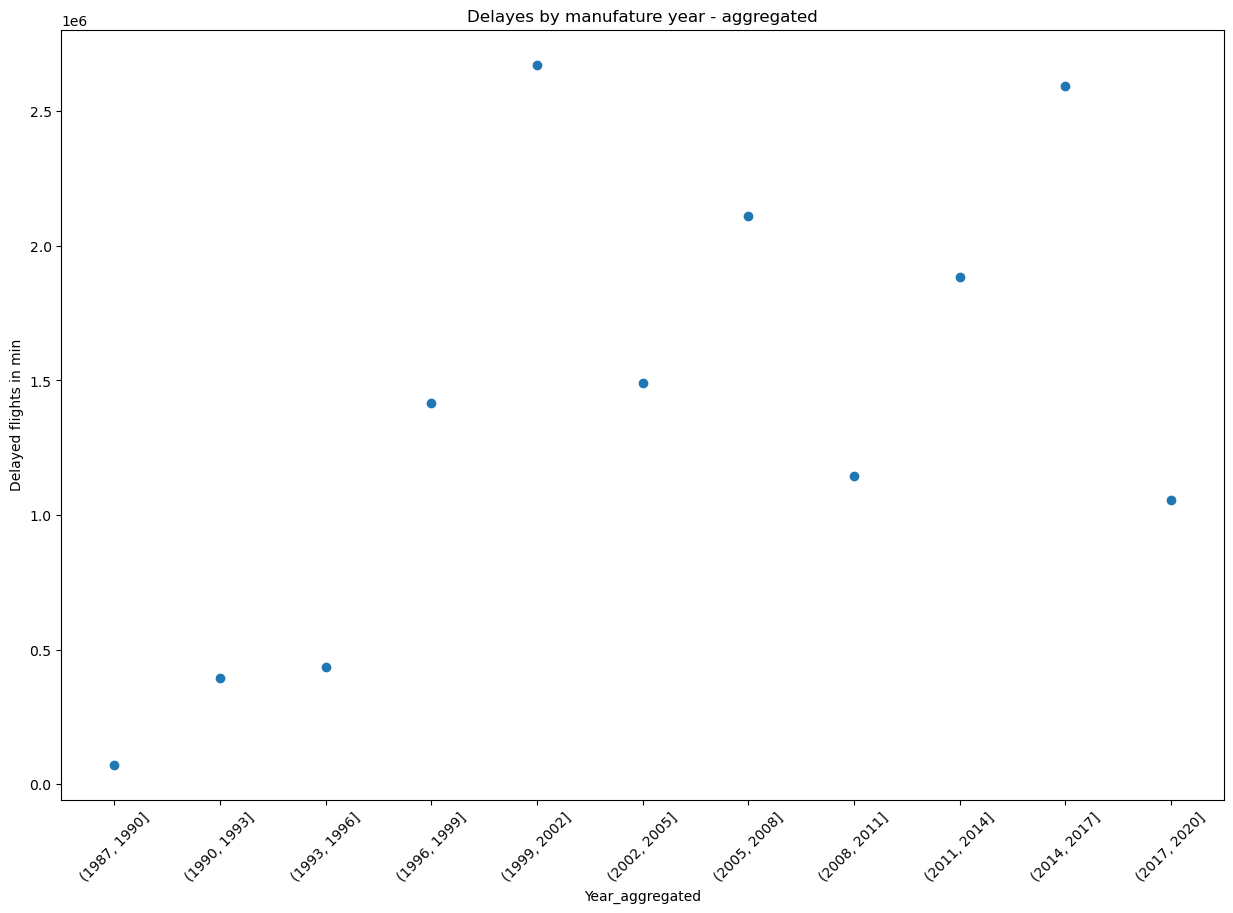

In [39]:
plt.figure(figsize = (15,10))

plt.scatter(flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'].astype(str), flight_delays_by_manufacture_year_agg_df['dep_delay'].astype(int) )

plt.title('Delayes by manufature year - aggregated')
plt.ylabel(ylabel='Delayed flights in min')
plt.xlabel(xlabel='Year_aggregated')
plt.xticks(flight_delays_by_manufacture_year_agg_df['manufacture_year_agg'].astype(str), rotation=45)

plt.show()

Tutaj wyznacz TOP 5 roczników produkcji - czyli sortując według liczby wykonanych lotów, pamiętaj o wyświetleniu również wartości opóźnienia.

In [40]:
delays_by_manufacture_year_updated_df

,manufacture_year,dep_delay
5,1992.0,198910.0
9,1996.0,193492.0
11,1998.0,564111.0
12,1999.0,694719.0
13,2000.0,870558.0
14,2001.0,1167796.0
15,2002.0,634755.0
16,2003.0,277354.0
17,2004.0,565000.0
18,2005.0,646599.0


In [41]:
flight_df_top = flight_df_top.sort_values(by = 'id', ascending = False)
top_manufactured_df = flight_df_top.nlargest(5, 'id')
top_manufactured_df

NameError: name 'flight_df_top' is not defined

 # Podsumowanie
 W tym notatniku do naszej wyjściowej ramki danych `flight_df` dołączyliśmy tabelę `aircraft_df` i za jej pomocą dodaliśmy kolejny wymiar do naszej analizy. Zauważmy, ile dodatkowych wniosków mogliśmy wyciągnąć dzięki jej dodaniu.

 Zanim przejdziemy dalej, należy zapisać bieżącą postać ramki (najlepiej lokalnie), która zostanie użyta w kolejnym notatniku.

 > **Wskazówka:**  
 > Aby uniknąć potencjalnych problemów, najlepiej zapisać ramkę z nazwą nawiązującą do tego notatnika, np. `flight_df_01`.

 Tutaj zapisz ramkę w najdogodniejszy sposób

In [ ]:
flight_df

In [ ]:
flight_df.to_csv(r'C:\Users\urszu\OneDrive\Pulpit\CodersLab - cwiczenia\Projekt koncowy\data\processed\flight_df_02.csv', index=False)